## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
from unittest.mock import inplace

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.info() # vendo informacoes do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# filtrando dados do dataset para analise
df_filt  = df[['longitude', 'latitude', 'housing_median_age', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']]
df_filt

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
#selecionando as colunas numerica do dataframe
numeric_df = df_filt.select_dtypes(include=[np.number])  # Filters numeric columns only

In [6]:
# calculando a correlacao da matrix
correlation_matrix = numeric_df.corr()

In [7]:
#confirme ou imprima a matriz de correlação para verificar o resultado
print("Computed Correlation Matrix:")
print(correlation_matrix)

Computed Correlation Matrix:
                    longitude  latitude  housing_median_age  population  \
longitude            1.000000 -0.924664           -0.108197    0.099773   
latitude            -0.924664  1.000000            0.011173   -0.108785   
housing_median_age  -0.108197  0.011173            1.000000   -0.296244   
population           0.099773 -0.108785           -0.296244    1.000000   
households           0.055310 -0.071035           -0.302916    0.907222   
median_income       -0.015176 -0.079809           -0.119034    0.004834   
median_house_value  -0.045967 -0.144160            0.105623   -0.024650   

                    households  median_income  median_house_value  
longitude             0.055310      -0.015176           -0.045967  
latitude             -0.071035      -0.079809           -0.144160  
housing_median_age   -0.302916      -0.119034            0.105623  
population            0.907222       0.004834           -0.024650  
households            1.000000

A correlação entre longitude e latitude é -0.924664, o que indica uma forte correlação negativa (quando uma aumenta, a outra tende a diminuir).
A correlação entre housing_median_age e median_house_value é -0.105623, indicando uma fraca correlação negativa (quase não há relação linear entre essas variáveis).
^^

Separe os dados em validação e teste


In [8]:
# fazendo um dropping da colunas separadas do dataframe
X = df_filt.drop(columns = ['median_house_value', 'population', 'median_income']).copy()

In [9]:
#Codificando variáveis categóricas como variáveis fictícias
X = pd.get_dummies(X, drop_first = True)

In [10]:
#respeitando o dataframe
#imprime informações detalhadas sobre o dataframe, incluindo os tipos de dados, uso de memória e contagens não nulas
#exibe as primeiras 5 linhas do dataframe para uma rápida olhada em seus valores
print(
    X.info())
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   households                  20640 non-null  float64
 4   ocean_proximity_INLAND      20640 non-null  bool   
 5   ocean_proximity_ISLAND      20640 non-null  bool   
 6   ocean_proximity_NEAR BAY    20640 non-null  bool   
 7   ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(4)
memory usage: 725.8 KB
None


NameError: name 'y' is not defined

In [11]:
y =  df_filt.loc[:,'median_house_value'] # acessado linhas da coluna com metodo loc
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [12]:
# separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [14]:
# agora vamos ajusta o modelo de regressao
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.


In [15]:
from sklearn.metrics import mean_squared_error

# Calculando o MSE no conjunto de treinamento
mse_train_1 = mean_squared_error(y_train, regr_1.predict(X_train))
mse_train_2 = mean_squared_error(y_train, regr_2.predict(X_train))

In [16]:
# Calculando o MSE no conjunto de teste

mse_test_1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse_test_2 = mean_squared_error(y_test, regr_2.predict(X_test))

In [17]:
# Template para exibição dos resultados
template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

In [18]:
# Imprimindo os resultados

print(template.format(regr_1.get_depth(), mse_train_1).replace(".", ","))
print(template.format(regr_2.get_depth(), mse_train_2).replace(".", ","))

O MSE da árvore com profundidade=2 é: 9577628659,45
O MSE da árvore com profundidade=8 é: 4590277205,54


In [19]:
print(template.format(regr_1.get_depth(), mse_test_1).replace(".", ","))
print(template.format(regr_2.get_depth(), mse_test_2).replace(".", ","))

O MSE da árvore com profundidade=2 é: 9176748466,99
O MSE da árvore com profundidade=8 é: 4937879076,63


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [20]:
# calculando o custo de complexidade de poda para reduzir o overfitting
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 5.16795866e+00, 8.07493540e+00, 9.05469423e+01,
        2.90697674e+02, 3.51744186e+02, 2.52034884e+03, 7.19509044e+03,
        1.06989664e+04, 1.34791226e+04, 1.39534884e+04, 2.14444803e+04,
        2.59278639e+04, 4.18779070e+04, 4.40671008e+04, 4.50828894e+04,
        4.62793605e+04, 6.88869749e+04, 6.89173342e+04, 7.03299419e+04,
        7.19638255e+04, 8.53346253e+04, 9.18140915e+04, 9.53360250e+04,
        9.74234057e+04, 1.00157219e+05, 1.09612511e+05, 1.13722007e+05,
        1.17279070e+05, 1.55307965e+05, 1.63067882e+05, 1.78611542e+05,
        1.83343225e+05, 1.91807428e+05, 1.93166370e+05, 2.01229679e+05,
        2.06266688e+05, 2.25820767e+05, 2.26878750e+05, 2.41490310e+05,
        2.56018963e+05, 2.59267191e+05, 2.73669789e+05, 2.74828381e+05,
        2.77824821e+05, 2.94017715e+05, 3.09326550e+05, 3.37429648e+05,
        3.50271363e+05, 3.56632214e+05, 3.74197234e+05, 3.77064599e+05,
        4.11982600e+05, 4.50069153e+05, 4.50964112

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

Text(0, 0.5, 'Impureza total das folhas')

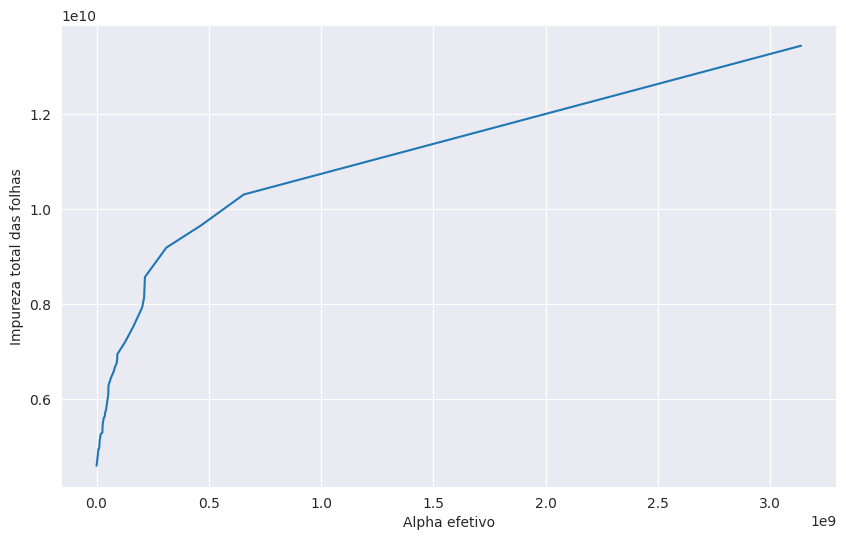

In [21]:
# Esse trecho de código está visualizando a relação entre os valores de ccp_alphas (parâmetros de poda)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [22]:
#Este código cria e treina múltiplos modelos de regressão baseados em árvores de
# #decisão (DecisionTreeRegressor) para diferentes valores de ccp_alpha, que
# #controla a poda das árvores. Vamos entender cada parte:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

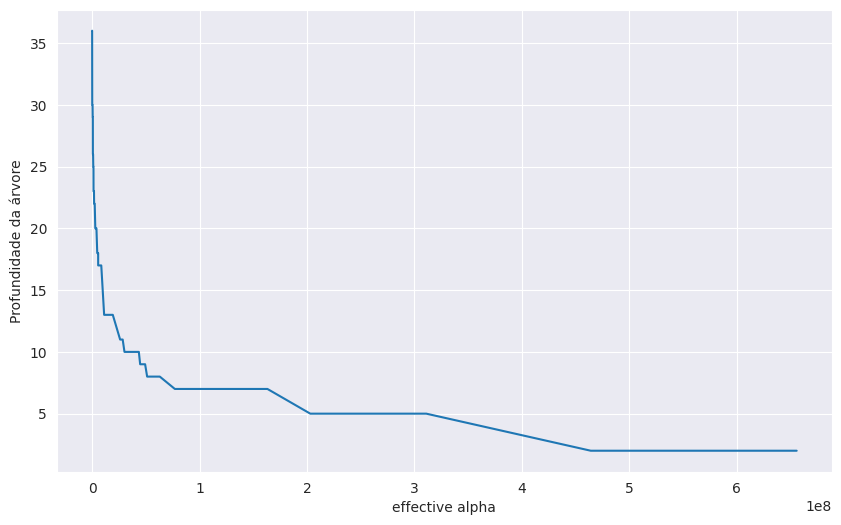

In [23]:
#Esse código cria um gráfico para visualizar a relação entre o valor de ccp_alpha
# #(parâmetro de poda) e a profundidade máxima da árvore (max_depth) nos diferentes
# #modelos treinados. Ele ajuda a entender como a poda afeta a complexidade #estrutural das árvores.

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [30]:
# criar em conjunto de dados aleatório
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [31]:
# ajustar modelo de regressão
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(max_depth=5)

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

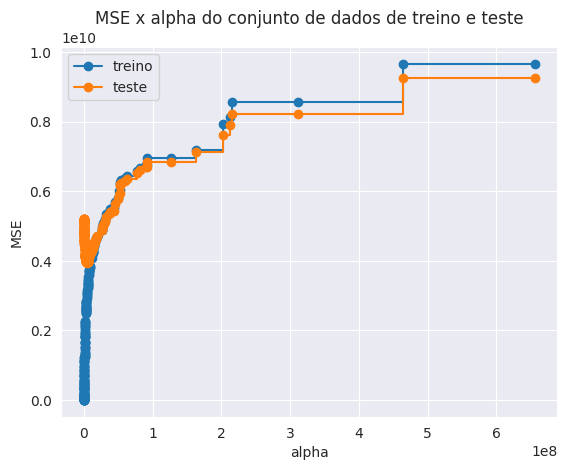

In [29]:
#Esse código analisa como o Erro Médio Quadrático (MSE) varia em relação ao parâmetro de poda
# (ccp_alpha) para os conjuntos de dados de treino e teste. Ele ajuda a #identificar o melhor
# valor de ccp_alpha que minimiza o overfitting e mantém bom desempenho preditivo

train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [38]:
#Este código cria e treina o modelo final de regressão baseado em árvore de decisão
# (DecisionTreeRegressor) usando um valor específico de ccp_alpha, que foi escolhido
# (provavelmente com base na análise anterior) como o melhor valor para poda.

arvore_final = DecisionTreeRegressor(random_state=123, ccp_alpha=regr_2.ccp_alpha )

arvore_final.fit(X_train, y_train)


DecisionTreeRegressor(random_state=123)

### 7. Visualize esta árvore.

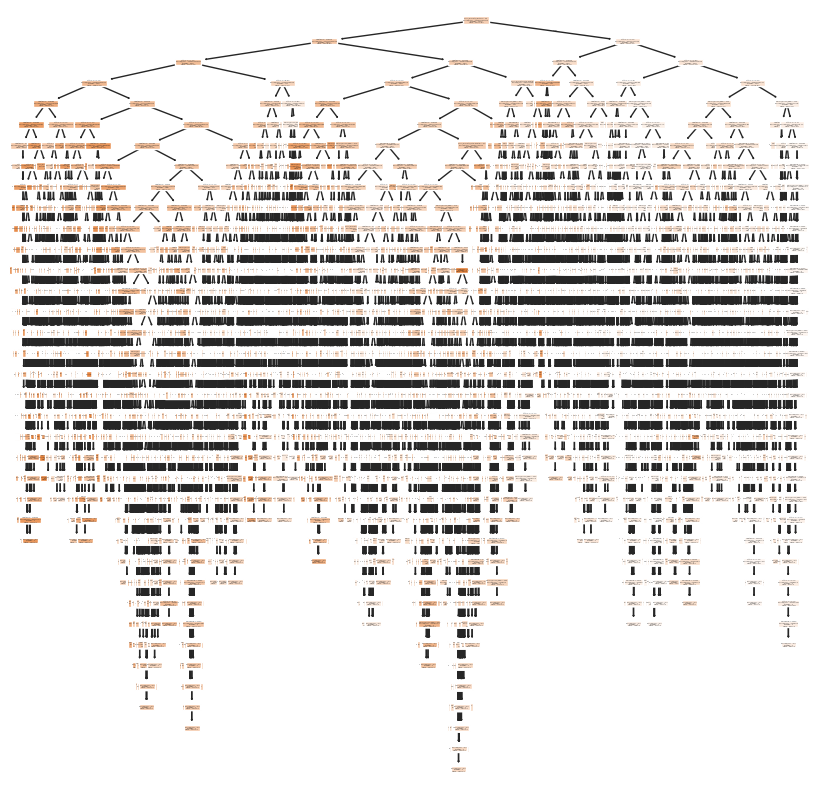

In [39]:
#Este código cria uma visualização gráfica da árvore de decisão final treinada
# (arvore_final). A biblioteca tree.plot_tree do Scikit-learn gera um diagrama
# que exibe os nós, critérios de divisão, valores preditivos, e outras informações
# importantes sobre a árvore.

plt.rc('figure', figsize=(10,10))

# Plotando a Árvore de Regressão através do tree.plot_tree().

tree.plot_tree(arvore_final, # Árvore utilizada.

               feature_names=list(X_train.columns), # nome das Colunas.

               filled=True) # Colorir a árvore.


plt.show() # Exibir a árvore.
